In [1]:
pip install pyodbc


Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import sqlite3
import numpy as np

In [3]:
# Create sqlite connection
sales = sqlite3.connect('chinook.db')

df = pd.read_sql_query("SELECT * FROM customer", sales)


In [4]:
#df['ID'] = df.index
#df.head()

In [5]:

df = pd.read_sql_query( '''


SELECT genre.name AS genre, COUNT(track.track_id) AS num_of_track,

ROUND(count(track.track_id) * 100.0 /
            (select count(*) from track),2)  as Percentage
  FROM  genre
  JOIN  track
   ON  genre.genre_id = track.genre_id
  JOIN album
   ON track.album_id =album.album_id
 GROUP BY genre.name
ORDER by num_of_track DESC



'''
    
    
  
    , sales)

In [6]:
df.head()

,genre,num_of_track,Percentage
0,Rock,1297,37.03
1,Latin,579,16.53
2,Metal,374,10.68
3,Alternative & Punk,332,9.48
4,Jazz,130,3.71


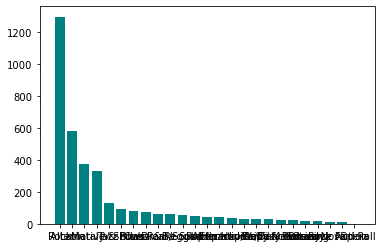

In [7]:
# Ensure plots are displayed inline in the notebook
%matplotlib inline

from matplotlib import pyplot as plt

# Create a bar plot of name vs grade
plt.bar(x=df.genre, height=df.num_of_track, color='teal')

# Display the plot
plt.show()

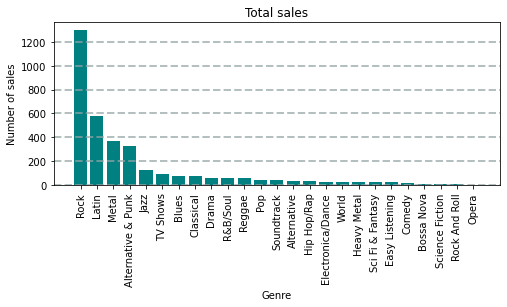

In [8]:
# Create a Figure
fig = plt.figure(figsize=(8,3))

# Create a bar plot of name vs grade
plt.bar(x=df.genre, height=df.num_of_track, color='Teal')

# Customize the chart
plt.title('Total sales')
plt.xlabel('Genre')
plt.ylabel('Number of sales')
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.xticks(rotation=90)

# Show the figure
plt.show()

In [9]:
data = pd.read_sql_query(
'''

SELECT 
   genre.name AS genre, album.title as album, count(album.album_id) as num_of_album , artist.name as artist,
    
    ROUND(count(*) * 100.0 /
            (select count(*) from album),2 )  as Percentage
    
    FROM  genre
    JOIN  track
   ON  genre.genre_id = track.genre_id     
 join invoice_line as i_l
on i_l.track_id = track.track_id
 join invoice
 ON i_l.invoice_id = invoice.invoice_id
 JOIN album
 ON track.album_id = album.album_id
 JOIN artist
 ON album.artist_id = artist.artist_id
 group by album.album_id
 ORDER BY num_of_album DESC


''', sales)



In [10]:
test = data.head(10)
test

,genre,album,num_of_album,artist,Percentage
0,Rock,Are You Experienced?,187,Jimi Hendrix,53.89
1,Metal,Faceless,96,Godsmack,27.67
2,Metal,Mezmerize,93,System Of A Down,26.80
3,Alternative & Punk,Get Born,90,JET,25.94
4,Rock,The Doors,83,The Doors,23.92
5,Rock,The Police Greatest Hits,80,The Police,23.05
6,Rock,Greatest Hits I,80,Queen,23.05
7,Rock,Big Ones,80,Aerosmith,23.05
8,Rock,From The Muddy Banks Of The Wishkah [live],78,Nirvana,22.48
9,Rock,My Generation - The Very Best Of The Who,76,The Who,21.90


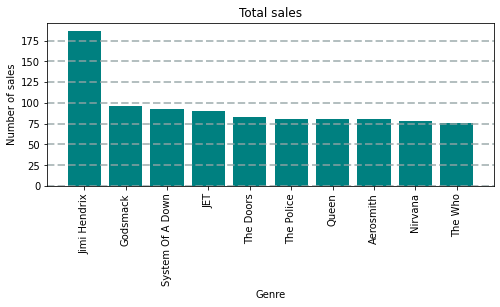

In [11]:
# Create a Figure
fig = plt.figure(figsize=(8,3))

# Create a bar plot of name vs grade
plt.bar(x=test.artist, height=test.num_of_album, color='Teal')

# Customize the chart
plt.title('Total sales')
plt.xlabel('Genre')
plt.ylabel('Number of sales')
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.xticks(rotation=90)

# Show the figure
plt.show()

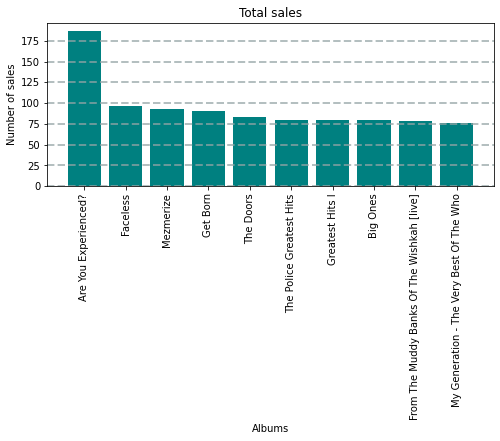

In [12]:
# Create a Figure
fig = plt.figure(figsize=(8,3))

# Create a bar plot of name vs grade
plt.bar(x=test.album, height=test.num_of_album, color='Teal')

# Customize the chart
plt.title('Total sales')
plt.xlabel('Albums')
plt.ylabel('Number of sales')
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.xticks(rotation=90)

# Show the figure
plt.show()

In [13]:
import seaborn as sb
sb.set()

In [27]:
data_sales = pd.read_sql_query('''

SELECT i1.invoice_id, SUBSTRING(i1.invoice_date, 1, 10) as date, i1.billing_country, i1.billing_city,
ROUND(i1.total,2) as total
  FROM invoice i1
  JOIN invoice i2
    ON i1.invoice_id >= i2.invoice_id
    where i1.billing_country in ('United Kingdom')
GROUP BY i1.invoice_id, i1.invoice_date, i1.total, i1.billing_country
--LIMIT 25
    


''', sales)


In [28]:
data_sales.head(10)

,invoice_id,date,billing_country,billing_city,total
0,23,2017-02-09,United Kingdom,London,9.90
1,64,2017-04-25,United Kingdom,London,12.87
2,96,2017-07-17,United Kingdom,London,5.94
3,106,2017-08-19,United Kingdom,Edinburgh,7.92
4,171,2018-01-30,United Kingdom,London,12.87
5,213,2018-04-01,United Kingdom,London,10.89
6,227,2018-05-16,United Kingdom,London,9.90
7,230,2018-05-21,United Kingdom,Edinburgh,7.92
8,237,2018-06-13,United Kingdom,London,15.84
9,244,2018-06-23,United Kingdom,London,4.95


In [29]:
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot # plot plotly graphs in line in a notebook
init_notebook_mode(connected = True)
# line chart using plotly expess Scatter
trace = go.Scatter(
                    x = data_sales["date"],
                    y = data_sales["total"],
                    mode = "lines+markers",
                    name = "TotalSales",
                    line = dict(width = 4),
                    marker = dict(
                                  size = 10,
                                  color = "rgba(120, 26, 120, 0.8)"
                                 ),
                    hovertemplate = " %{x}<br>£%{y:,.0f} <extra></extra>",
                  )
line_data = [trace]
layout = dict(
              title = "Total Sales by Month",
              titlefont = dict(size = 20),
              margin=dict(l=10, r=50, b=10, t=70, pad=0),
              xaxis= dict(title= "Month",ticklen = 5,zeroline = False),
              yaxis= dict(title= "Total Sales", tickformat = ",.0f", tickprefix="£")
             )
fig = dict(data = line_data, layout = layout)
iplot(fig)

In [30]:
# calculate total sales by country
dfs= pd.DataFrame(data_sales.groupby("billing_city") \
["total"].sum()).reset_index().rename({"total":"TotalSales"},axis=1)

In [31]:
dfs.head()

,billing_city,TotalSales
0,Edinburgh,79.20
1,London,166.32


In [32]:
import plotly.express as px # used for interactive visualizations

fig = px.pie(dfs.head(),
             values="TotalSales",
             names="billing_city",
             title="Percent of Total Sales by Country",
             color_discrete_sequence=px.colors.qualitative.G10
            )
# px.colors.qualitative.swatches().show() # see available color palettes

fig.update_traces(
                  textposition="inside",
                  textinfo="percent+label"
                 )
fig.update_layout(
                  margin=dict(l=10, r=50, b=10, t=70, pad=0),
                  titlefont = dict(size = 20)
                 )
iplot(fig)

customers analys

In [33]:
data_customers = pd.read_sql_query(
 
'''
SELECT  customer.country, customer.city ,
       CASE
            WHEN customer.country in ('Canada', 'USA') then 'North_America'
            WHEN customer.country in ( 'France','Czech Republic','Austria','Belgium','Denmark' ,                     
               'Finland','Hungary','Ireland','Italy','Netherlands', 'Poland', 'Spain','Sweden', 'Norway',
              'Portugal','Germany', 'United Kingdom') then 'Europe'
            WHEN customer.country in ('Brazil', 'Chile', 'Argentina') then 'South_America'
            WHEN customer.country in ('India') then 'Asia'
            WHEN customer.country in  ('Australia') then 'Oceania'
            ELSE 'Other'
           
    END AS continent, ROUND(SUM(total),2) as total , SUBSTRING(invoice.invoice_date, 1 , 10) as date
    
FROM customer  
JOIN invoice
  ON customer.customer_id = invoice.customer_id

GROUP BY invoice.invoice_id , date
--ORDER BY customers DESC





''', sales)


In [34]:
#data_customers.head(10)
#asia
dfa = data_customers.where(data_customers['continent'] == "Asia").dropna()
#SouthAmerica
dsa = data_customers.where(data_customers['continent'] == "South_America").dropna()
#Europe
de = data_customers.where(data_customers['continent'] == "Europe").dropna()
#America
dna = data_customers.where(data_customers['continent'] == "North_America").dropna()
doceania = data_customers.where(data_customers['continent'] == "Oceania").dropna()

In [35]:
doceania

,country,city,continent,total,date
25,Australia,Sidney,Oceania,1.98,2017-02-15
89,Australia,Sidney,Oceania,10.89,2017-06-28
98,Australia,Sidney,Oceania,17.82,2017-07-28
355,Australia,Sidney,Oceania,6.93,2019-05-04
426,Australia,Sidney,Oceania,14.85,2019-09-14
429,Australia,Sidney,Oceania,1.98,2019-09-20
449,Australia,Sidney,Oceania,6.93,2019-12-04
554,Australia,Sidney,Oceania,1.98,2020-09-04
585,Australia,Sidney,Oceania,10.89,2020-11-01
609,Australia,Sidney,Oceania,6.93,2020-12-21


In [36]:


trace1 = go.Scatter(
                    x = dsa["date"],
                    y = dsa["total"],
                    mode = "lines+markers",
                    name = "SouthAmerica",
                    line = dict(width = 4),
                    marker = dict(
                                  size = 10,
                                  color = "#0E79B2"
                                 ),
                     hovertemplate = " %{x}<br>£%{y:,.0f} <extra></extra>",
                  )
trace2 = go.Scatter(
                    x = dfa["date"],
                    y = dfa["total"],
                    mode = "lines+markers",
                    name = "Asia",
                    line = dict(width = 4),
                    marker = dict(
                                  size = 10,
                                  color = "rgba(242, 225, 39, 1)"
                                 ),

                     hovertemplate = " %{x}<br>£%{y:,.0f} <extra></extra>",
                  )


line_data = [trace1, trace2]

layout = dict(
              title = "Customers by Month",
              titlefont = dict(size = 20),
              margin=dict(l=10, r=50, b=10, t=70, pad=0),
              xaxis= dict(title= "Month",ticklen = 5,zeroline = False),
              #yaxis= dict(title= "sales"),
              yaxis= dict(title= "Total Sales", tickformat = ",.0f", tickprefix="£"),
              legend=dict(
                          font = dict(size = 12),
                          yanchor = "top",
                          y=0.98,
                          x= 0.01
                         )
    
             )
fig = dict(data = line_data, layout = layout)
iplot(fig)



In [37]:
# line chart using plotly expess Scatter
#char for Oceania
trace = go.Scatter(
                    x = doceania["date"],
                    y = doceania["total"],
                    mode = "lines+markers",
                    name = "TotalSales",
                    line = dict(width = 4),
                    marker = dict(
                                  size = 10,
                                  color = "rgba(255, 165, 0, 0.8)"
                                 ),
                    hovertemplate = " %{x}<br>£%{y:,.0f} <extra></extra>",
                  )
line_data = [trace]
layout = dict(
              title = "Total Sales by Month",
              titlefont = dict(size = 20),
              margin=dict(l=10, r=50, b=10, t=70, pad=0),
              xaxis= dict(title= "Month",ticklen = 5,zeroline = False),
              yaxis= dict(title= "Total Sales", tickformat = ",.0f", tickprefix="£")
             )
fig = dict(data = line_data, layout = layout)
iplot(fig)

In [38]:
# line chart using plotly expess Scatter
#char for SouthAmerica
trace = go.Scatter(
                    x = dsa["date"],
                    y = dsa["total"],
                    mode = "lines+markers",
                    name = "TotalSales",
                    line = dict(width = 4),
                    marker = dict(
                                  size = 10,
                                  color = "hsl(112, 21%, 74%)"
                                 ),
                    hovertemplate = " %{x}<br>£%{y:,.0f} <extra></extra>",
                  )
line_data = [trace]
layout = dict(
              title = "Total sale overall",
              titlefont = dict(size = 20),
              margin=dict(l=10, r=50, b=10, t=70, pad=0),
              xaxis= dict(title= "Period",ticklen = 5,zeroline = False),
              yaxis= dict(title= "Total Sales", tickformat = ",.0f", tickprefix="£")
             )
fig = dict(data = line_data, layout = layout)
iplot(fig)

In [43]:
#pie chart for Soutth America
fig = px.pie(dsa,
             values="total",
             names="country",
             title="Percentage sale by city",
             color_discrete_sequence=px.colors.qualitative.G10
            )
# px.colors.qualitative.swatches().show() # see available color palettes

fig.update_traces(
                  textposition="inside",
                  textinfo="percent+label"
                 )
fig.update_layout(
                  margin=dict(l=10, r=50, b=10, t=70, pad=0),
                  titlefont = dict(size = 20)
                 )
iplot(fig)

sources : https://www.kaggle.com/code/atanaskanev/sales-analysis-and-visualization

In [54]:
d_c = pd.read_sql_query(

'''
SELECT  customer.country, COUNT(distinct customer.customer_id) as customers, 
       ROUND(SUM(total),2) as total , COUNT(distinct invoice_id) as numb_ord
FROM customer  
JOIN invoice
  ON customer.customer_id = invoice.customer_id

GROUP BY country
ORDER BY customers DESC

''', sales )

In [55]:
d_c.head()

,country,customers,total,numb_ord
0,USA,13,1040.49,131
1,Canada,8,535.59,76
2,France,5,389.07,50
3,Brazil,5,427.68,61
4,Germany,4,334.62,41


In [62]:
#pie chart for Soutth America
fig = px.pie(d_c.tail(),
             values="customers",
             names="country",
             title="Number customers by city",
             color_discrete_sequence=px.colors.qualitative.G10
            )
# px.colors.qualitative.swatches().show() # see available color palettes

fig.update_traces(
                  textposition="inside",
                  textinfo="percent+label"
                 )
fig.update_layout(
                  margin=dict(l=10, r=50, b=10, t=70, pad=0),
                  titlefont = dict(size = 20)
                 )
iplot(fig)